# Part 1 Business Understanding

By looking at the data initially, we can identify several useful and high quality data, such as mileage, fuel, and owners. To get insight out of the car dataset, we ask following three questions to start data cleaning and exploration


1. Cars make and model can last longest.
2. Cars make and model have lowest fuel costs.
3. cars gets sold most often/owner hates the most.

# Part 2 Import Data
In this session, we loaded car detail dataset locally and import packages.

## Library used
pandas
numpy

In [23]:
import pandas as pd
import numpy as np

## Load Dataset

In [106]:
df = pd.read_csv('C:/Users/uswumi/OneDrive - NESTLE/Projects - Supply Chain Analytics/Trainings/Udacity Project 1/Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Checking for Null Values
initial review and check on data quality

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# Part 3 Data cleaning
In this part, we conducted data cleaning, which mainly uses dropna() function.

In [107]:
df=df.dropna()
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

# Part 4 Question 1 Cars make and model can drive longest milages
To answer the first question, we look at the mileage of popular brands in the market. 
Start with data aggregation

In [45]:
df[['make','model']] = df["name"].str.split(" ", 1, expand=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,make,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,Hyundai,Xcent 1.2 VTVT E Plus
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti,Wagon R LXI DUO BSIII
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,Maruti,800 DX BSII
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,Toyota,Etios VXD
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,Ford,Figo Diesel Celebration Edition


In [47]:
for method in ['average', 'min', 'max', 'dense', 'first']:
    df[f'{method}_rank'] = df.groupby('make')['km_driven'].rank(method)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,make,model,average_rank,min_rank,max_rank,dense_rank,first_rank
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,2274.0,2274.0,2274.0,324.0,2274.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,83.5,80.0,87.0,31.0,80.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,453.0,450.0,456.0,127.0,450.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,1303.5,1303.0,1304.0,214.0,1303.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,2171.5,2113.0,2230.0,300.0,2113.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,Hyundai,Xcent 1.2 VTVT E Plus,515.5,510.0,521.0,101.0,510.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti,Wagon R LXI DUO BSIII,2327.0,2324.0,2330.0,342.0,2324.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,Maruti,800 DX BSII,29.5,13.0,46.0,10.0,13.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,Toyota,Etios VXD,249.0,241.0,257.0,67.0,241.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,Ford,Figo Diesel Celebration Edition,376.0,376.0,376.0,141.0,376.0


In [70]:
df = df.sort_values(by='average_rank', ascending=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,make,model,average_rank,min_rank,max_rank,dense_rank,first_rank
4372,Opel Astra 1.6,1998,68000,110000,Petrol,Individual,Manual,Third Owner,13.1 kmpl,1598 CC,77 bhp,121Nm@ 2800rpm,5.0,Opel,Astra 1.6,1.0,1.0,1.0,1.0,1.0
2938,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38 kmpl,2993 CC,265 bhp,620Nm@ 1500-2500rpm,7.0,BMW,X7 xDrive 30d DPE,1.0,1.0,1.0,1.0,1.0
6163,Datsun RediGO SV 1.0,2019,325000,1300,Petrol,Individual,Manual,First Owner,22.5 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0,Datsun,RediGO SV 1.0,1.0,1.0,1.0,1.0,1.0
4974,Ambassador Grand 1500 DSZ BSIII,2008,122000,60000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0,Ambassador,Grand 1500 DSZ BSIII,1.0,1.0,1.0,1.0,1.0
2140,Daewoo Matiz SS,2000,86000,46951,Petrol,Individual,Manual,First Owner,18.5 kmpl,796 CC,53 bhp,71Nm@ 3500rpm,5.0,Daewoo,Matiz SS,1.0,1.0,1.0,1.0,1.0
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0,Audi,A6 35 TFSI Matrix,1.0,1.0,1.0,1.0,1.0
2964,Skoda Rapid 1.6 MPI AT Ambition BSIV,2019,835000,10000,Petrol,Individual,Automatic,First Owner,14.84 kmpl,1598 CC,103.2 bhp,153Nm@ 3750-3800rpm,5.0,Skoda,Rapid 1.6 MPI AT Ambition BSIV,1.0,1.0,1.0,1.0,1.0
1996,Volkswagen Polo 1.2 MPI Comfortline,2019,635000,2000,Petrol,Dealer,Manual,First Owner,16.2 kmpl,1199 CC,74 bhp,110Nm@ 3000-4300rpm,5.0,Volkswagen,Polo 1.2 MPI Comfortline,1.0,1.0,1.0,1.0,1.0
7340,Mercedes-Benz GL-Class 220d 4MATIC Sport,2018,4600000,6000,Diesel,Dealer,Automatic,First Owner,17.9 kmpl,2143 CC,170 bhp,400Nm@ 1400-2800rpm,5.0,Mercedes-Benz,GL-Class 220d 4MATIC Sport,1.0,1.0,1.0,1.0,1.0
5389,Tata Tiago 2019-2020 XZ Plus Diesel,2019,670000,2000,Diesel,Individual,Manual,First Owner,27.28 kmpl,1047 CC,69 bhp,140Nm@ 1800-3000rpm,5.0,Tata,Tiago 2019-2020 XZ Plus Diesel,1.0,1.0,1.0,1.0,1.0


In [83]:
df2 = df.groupby(['make']).agg({'name':'count', 'km_driven': 'mean'}).reset_index()
df2 = df2.sort_values(by='km_driven', ascending=False)
df2 = df2.loc[df2['name']>100]
df2

,make,name,km_driven
28,Toyota,452,101016.438053
19,Mahindra,758,90674.497361
27,Tata,719,80687.777469
4,Chevrolet,230,79785.373913
9,Ford,388,72469.456186
29,Volkswagen,185,71949.021622
26,Skoda,104,71086.144231
11,Hyundai,1360,63812.152206
20,Maruti,2367,63567.978876
10,Honda,466,59944.042918


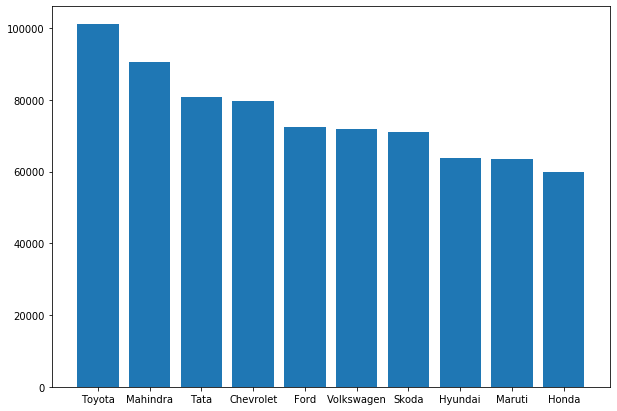

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

make = df2['make'].head(12)
km_driven = df2['km_driven'].head(12)

fig = plt.figure(figsize =(10, 7))
plt.bar(make[0:10], km_driven[0:10])
'''
this function provides visualization of which car brand last longest with its average mileage in a bar plot

input: make, km_driven

output: car brand vs average mileage

'''
plt.show()

In [76]:
df3 = df.groupby(['make','model']).agg({'name':'count', 'km_driven': 'mean'}).reset_index()
df3 = df3.sort_values(by='km_driven', ascending=False)
df3

,make,model,name,km_driven
1862,Toyota,Innova 2.5 EV Diesel PS 7 Seater BSIII,1,500000.000000
1881,Toyota,Innova 2.5 VX (Diesel) 7 Seater BS IV,1,426000.000000
803,Mahindra,Bolero DI Non AC BSIII,1,300000.000000
1908,Toyota,Qualis FS B3,1,290000.000000
1745,Tata,Sumo Gold GX BSIII,1,270000.000000
119,Chevrolet,Tavera Neo LT-L - 9 seats BSII,1,265000.000000
722,Hyundai,i20 Asta 1.2,12,260325.666667
1855,Toyota,Innova 2.5 E 7 STR,1,250000.000000
107,Chevrolet,Tavera B2 8 Seats BSIII,1,250000.000000
1702,Tata,New Safari DICOR 2.2 EX 4x4 BS IV,1,250000.000000


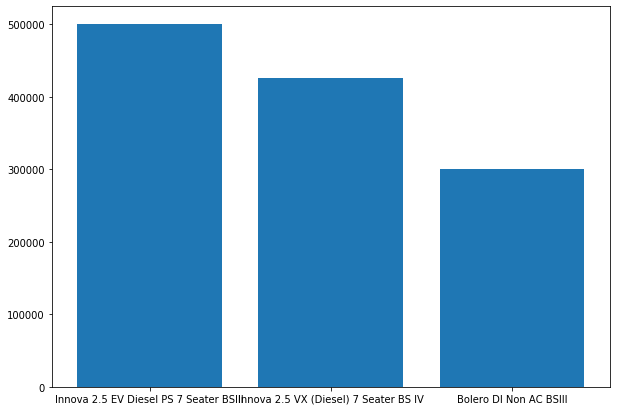

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

make = df3['model'].head(12)
km_driven = df3['km_driven'].head(12)

fig = plt.figure(figsize =(10, 7))
plt.bar(make[0:3], km_driven[0:3])
'''
this function provides visualization of top 3 car model last longest with its average mileage in a bar plot

input: model, km_driven

output: model vs average mileage, top 3

'''
plt.show()

## Conclusion for Question 1
after research, major car brands can last longest on the market are Toyota, Mahindra and Tata;

the best models to get are Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII, Toyota Qualis FS B3 and Mahindra Bolero DI Non AC BSIII	

Toyota earns its relibility reputation as always, on average, it can last over 100,000 kms. Followed by Mahindra and Tata. Those two brands seem to be local(India) homemade, which could be better supplied with spare parts and technician for them to last longer.

If you’d like to know which model to purchase, the data gaves the answer: Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII, Toyota Qualis FS B3 and Mahindra Bolero DI Non AC BSIII. They all last over 300,000 kms and the Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII lasted over 500,000kms thanks to its reliable and simple diesel powertrain.

# Part 5 Question 2 Cars make and model have lowest fuel costs.

To look at which car will help you save more money on fuel, especially in this economy. We look at all three types of fuels: gasoline, diesel and CNG and convert the fuel cost to Kilometers per dollar (kmpdollar).

In [119]:
df4=df
df4[['kmpl','unit']] = df4["mileage"].str.split(" ", 1, expand=True)
df4['kmpl'] = df4['kmpl'].astype(float)
df4[['make','model']] = df4["name"].str.split(" ", 1, expand=True)
df4



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mpg,unit,make,model,kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,kmpl,Maruti,Swift Dzire VDI,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,kmpl,Skoda,Rapid 1.5 TDI Ambition,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,kmpl,Honda,City 2017-2020 EXi,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,kmpl,Hyundai,i20 Sportz Diesel,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,kmpl,Maruti,Swift VXI BSIII,16.10
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,20.14,kmpl,Hyundai,Xcent 1.2 VTVT E Plus,20.14
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,17.30,km/kg,Maruti,Wagon R LXI DUO BSIII,17.30
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,16.10,kmpl,Maruti,800 DX BSII,16.10
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,23.59,kmpl,Toyota,Etios VXD,23.59
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,20.00,kmpl,Ford,Figo Diesel Celebration Edition,20.00


In [120]:
df5 = df4.groupby(['make','model','fuel']).agg({'name':'count', 'kmpl': 'mean'}).reset_index()
df5 = df5.sort_values(by='kmpl', ascending=False)
df5

,make,model,fuel,name,kmpl
1981,Volvo,XC90 T8 Excellence BSIV,Petrol,1,42.000000
1030,Maruti,Alto 800 CNG LXI Optional,CNG,2,33.440000
1037,Maruti,Alto 800 LXI CNG,CNG,1,33.000000
1327,Maruti,Wagon R CNG LXI,CNG,1,32.520000
1049,Maruti,Alto K10 LXI CNG,CNG,1,32.260000
1029,Maruti,Alto 800 CNG LXI,CNG,3,31.453333
1228,Maruti,Swift DDiS LDI,Diesel,1,28.400000
1224,Maruti,Swift AMT ZDI,Diesel,2,28.400000
1260,Maruti,Swift Dzire ZDI Plus,Diesel,5,28.400000
1236,Maruti,Swift Dzire AMT ZDI Plus,Diesel,4,28.400000


In [122]:
df_Petrol = df5[(df5['fuel'] == 'Petrol')]
df_Petrol["kmpdollar"] = df_Petrol["kmpl"]/
df_Diesel = df5[(df5['fuel'] == 'Diesel')]
df_CNG = df5[(df5['fuel'] == 'CNG')]

df_Petrol

,make,model,fuel,name,kmpl
1981,Volvo,XC90 T8 Excellence BSIV,Petrol,1,42.000000
1690,Tata,Nano Lx,Petrol,1,26.000000
1687,Tata,Nano Cx BSIV,Petrol,1,26.000000
1685,Tata,Nano Cx,Petrol,4,26.000000
1691,Tata,Nano Lx BSIV,Petrol,4,25.550000
1693,Tata,Nano Twist XE,Petrol,1,25.400000
1692,Tata,Nano STD,Petrol,1,25.400000
1684,Tata,Nano CX,Petrol,2,25.400000
1686,Tata,Nano Cx BSIII,Petrol,2,25.400000
1688,Tata,Nano LX,Petrol,1,25.400000


## Conclusion for question 2

From the ‘kmpdollar’ indicator, it shows that CNG powered vehicles from Maruti takes the top of the board. They can run around 50 kms with $1 of fuel! But if CNG is not the fuel that accessible to your daily route, The next best ones for your are Volvo XC90 T8 Excellence BSIV for luxury brands and Tata Nano Cx BSIV for economy brands.

# Part 6 Question 3 cars gets sold most often/owner hates the most.

To buy a car that last longer, you will also need to love them. We also look at on average how many owners does each car brand have. 

## Conclusion for question 3
On average, Chevrolet has more than 1.6 ownerships, much higher than the second place Volkswagen. The Toyota ranked #4 in the list, which make sense as well due to its long durability, which means it might outlived its owner.

this part I lost code due to I fail to save the last version in submission 1. The results are saved in blog